# АНАЛІЗ ЧАСОВИХ ПОСЛІДОВНОСТЕЙ
### Мета роботи:
ознайомитись з методами моделювання часових послідовностей.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Завдання 1
Побудувати та проаналізувати часовий ряд для статистики захворювань на Covid в двох сусідніх країнах по вашому вибору (дані взяти в інтернеті).

### Data preprocessing
Залишаємо лише дані, які стосуються обраних країн, а саме України та Польщі.

In [2]:
values = ['Ukraine', 'Poland']
df = pd.read_csv('dataset.csv', usecols=['location','date','new_cases'], index_col=['date'])
df = df[df['location'].isin(values)].pivot_table(index='date', columns='location', values='new_cases').fillna(0)

### Побудуємо часовий ряд:

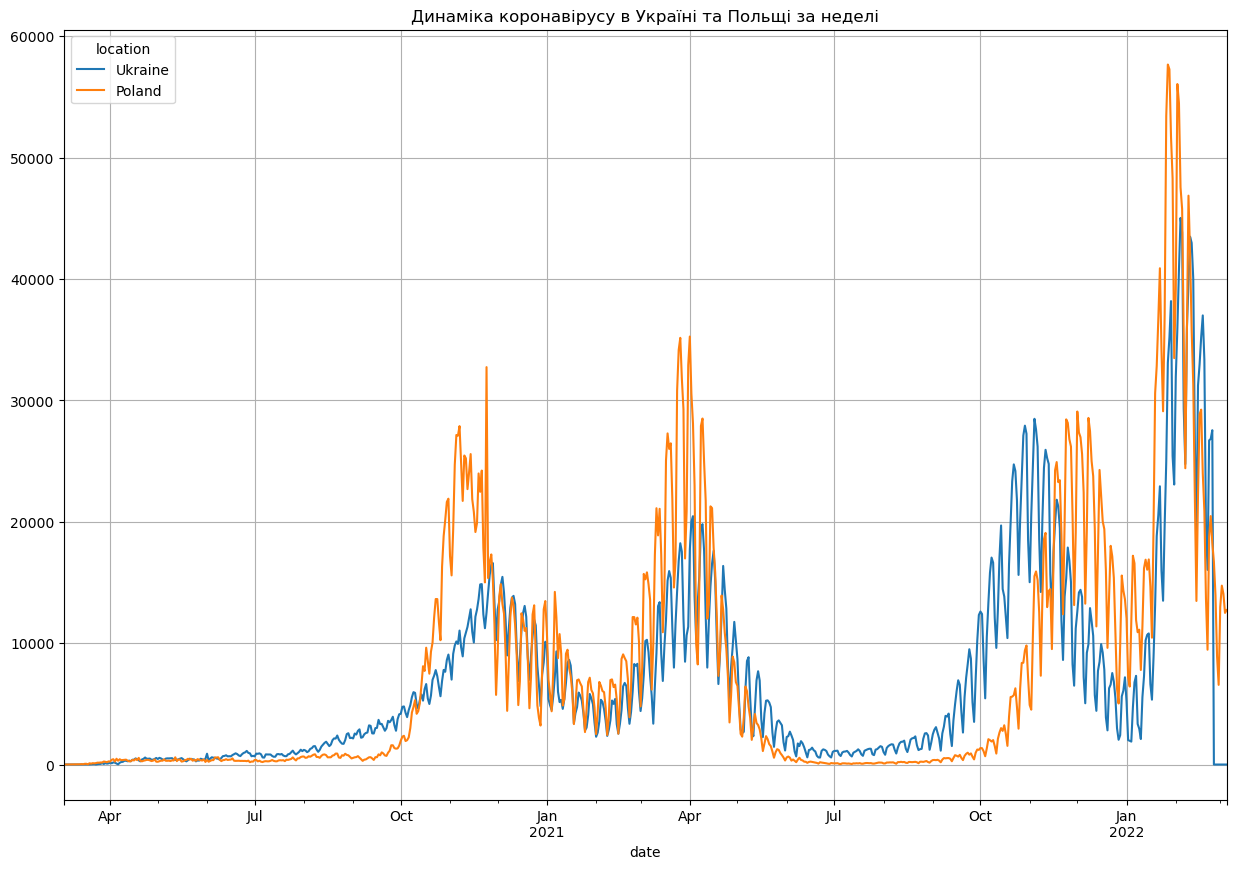

In [3]:
df.index = pd.to_datetime(df.index)

daily_df = df.resample('D').sum()

fig, ax = plt.subplots(figsize=(15, 10))
daily_df[['Ukraine', 'Poland']].plot(ax=ax)
plt.title('Динаміка коронавірусу в Україні та Польщі за неделі')
ax.grid()
plt.show()

### Для кращої візуалізації властивостей ряду (трендів, сезонності тощо) застосуємо згладжування за допомогою ковзаючого середнього:

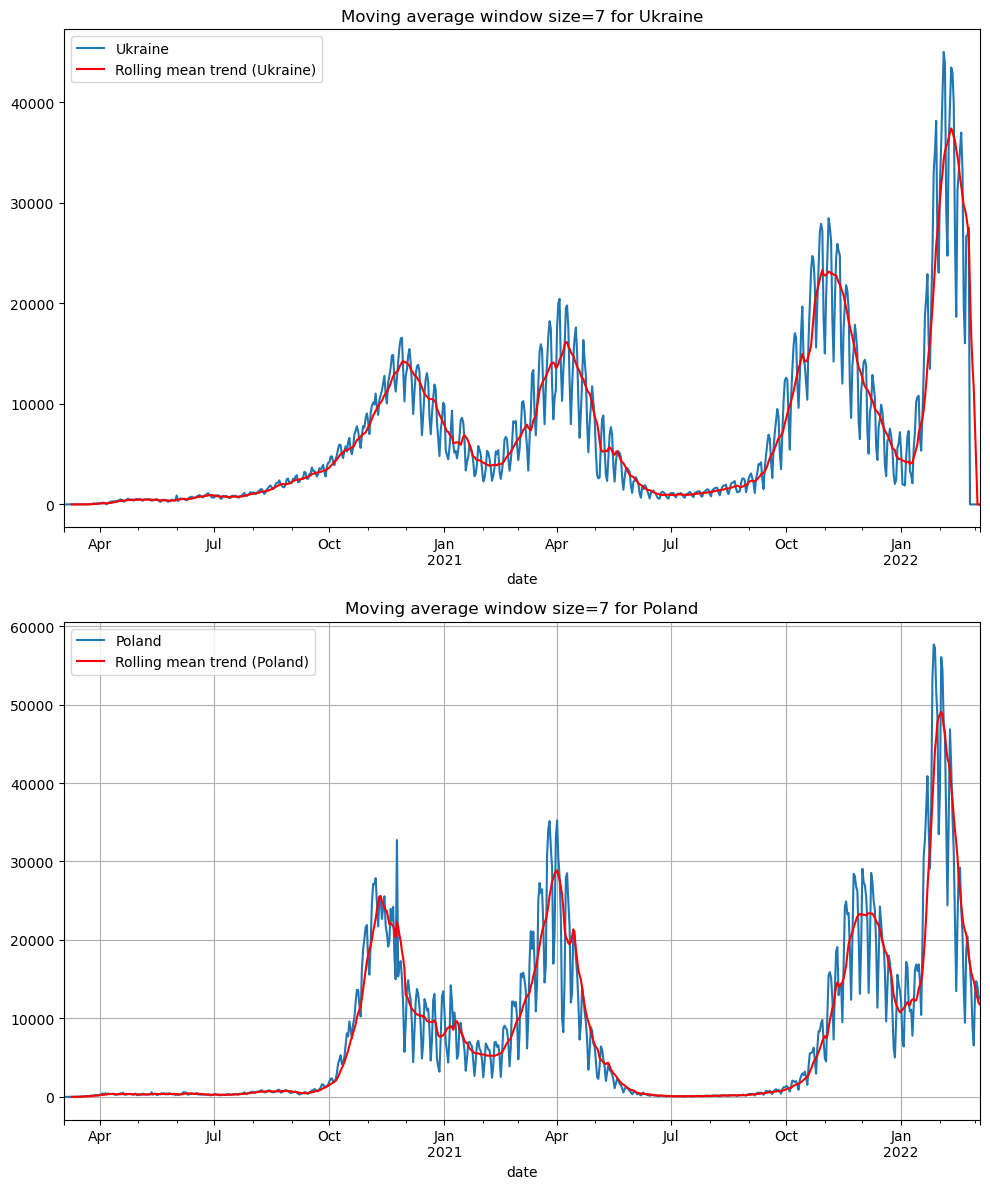

In [4]:
rolling_mean_ukraine = df['Ukraine'].rolling(window=7).mean()
rolling_mean_poland = df['Poland'].rolling(window=7).mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

df[['Ukraine']].plot(ax=ax1)
ax1.plot(rolling_mean_ukraine, c='red', label='Rolling mean trend (Ukraine)')
ax1.legend(loc='upper left')
ax1.set_title('Moving average window size=7 for Ukraine')

df[['Poland']].plot(ax=ax2)
ax2.plot(rolling_mean_poland, c='red', label='Rolling mean trend (Poland)')
ax2.legend(loc='upper left')
ax2.set_title('Moving average window size=7 for Poland')

plt.tight_layout()
plt.grid(True)
plt.show()

### Візуалізуємо декомпозицію ряду на тренд, сезонність та залишки для обох країн:

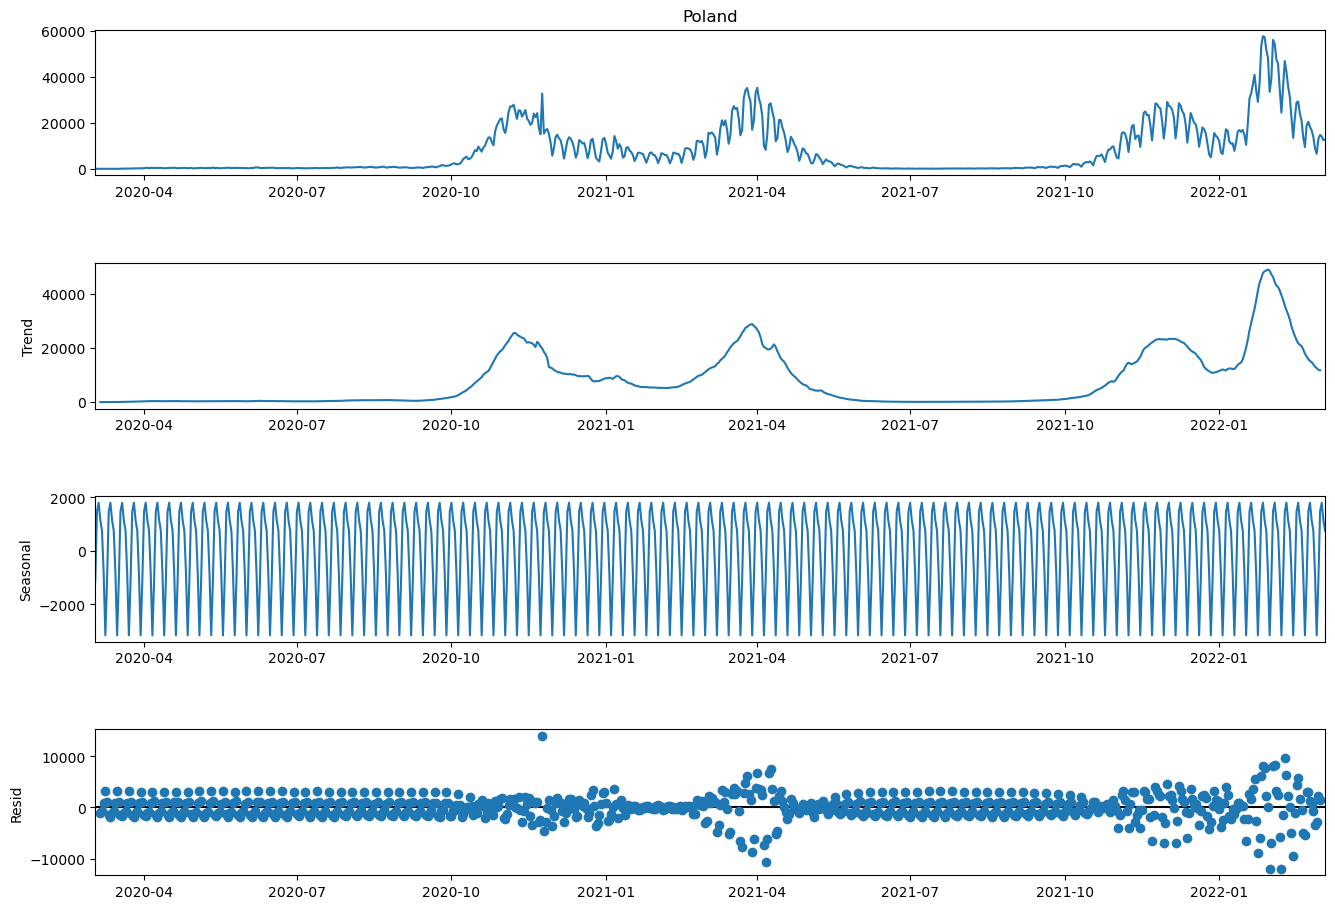

In [5]:
decomposition_poland = smt.seasonal_decompose(df.Poland)

fig = decomposition_poland.plot()
fig.set_size_inches(15, 10)

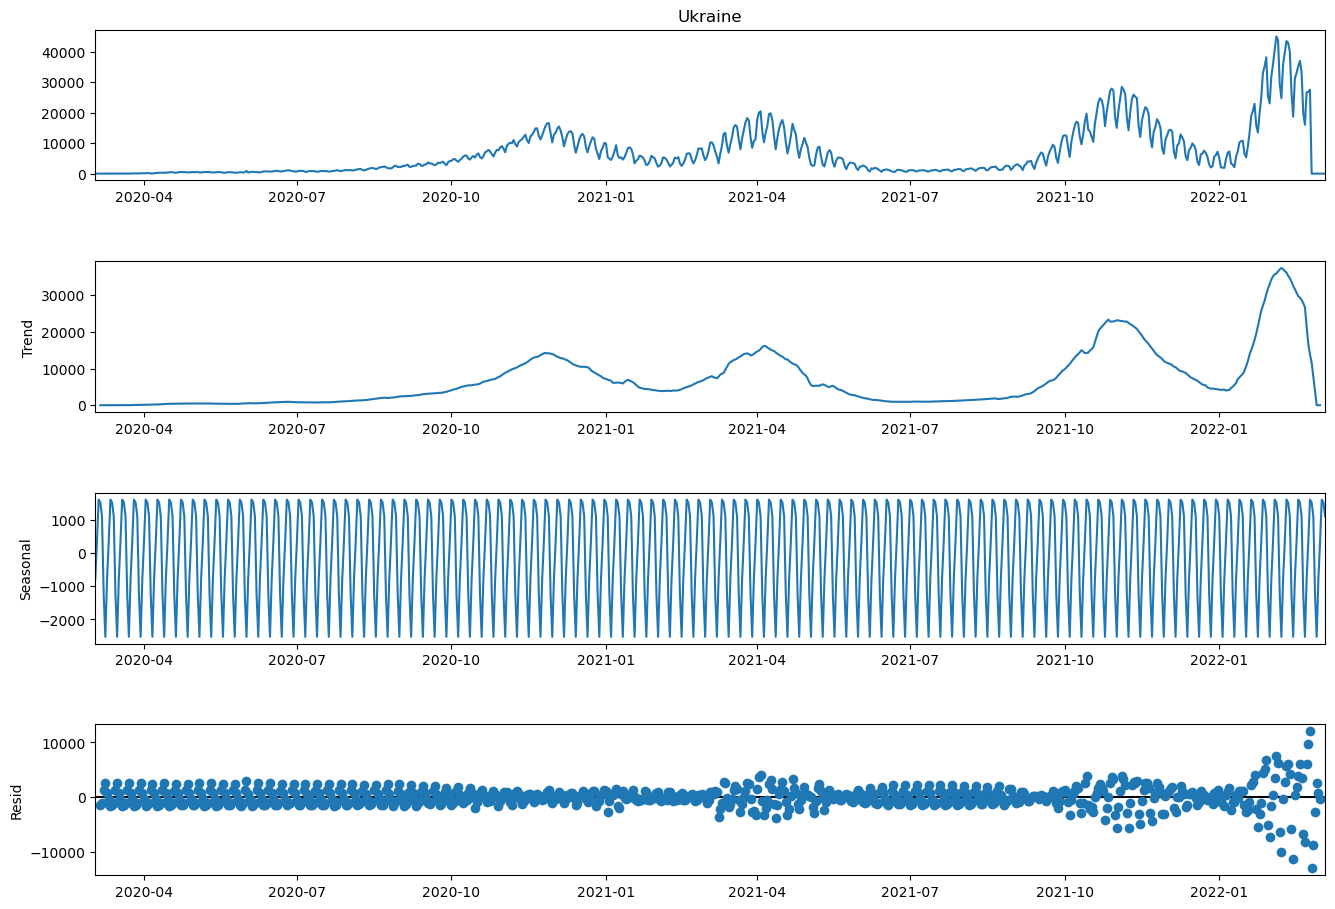

In [6]:
decomposition_ukraine = smt.seasonal_decompose(df.Ukraine)

fig = decomposition_ukraine.plot()
fig.set_size_inches(15, 10)

### Побудуємо графіки автокореляції та часткової автокореляції:

Спочатку для Польщі:

D:\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


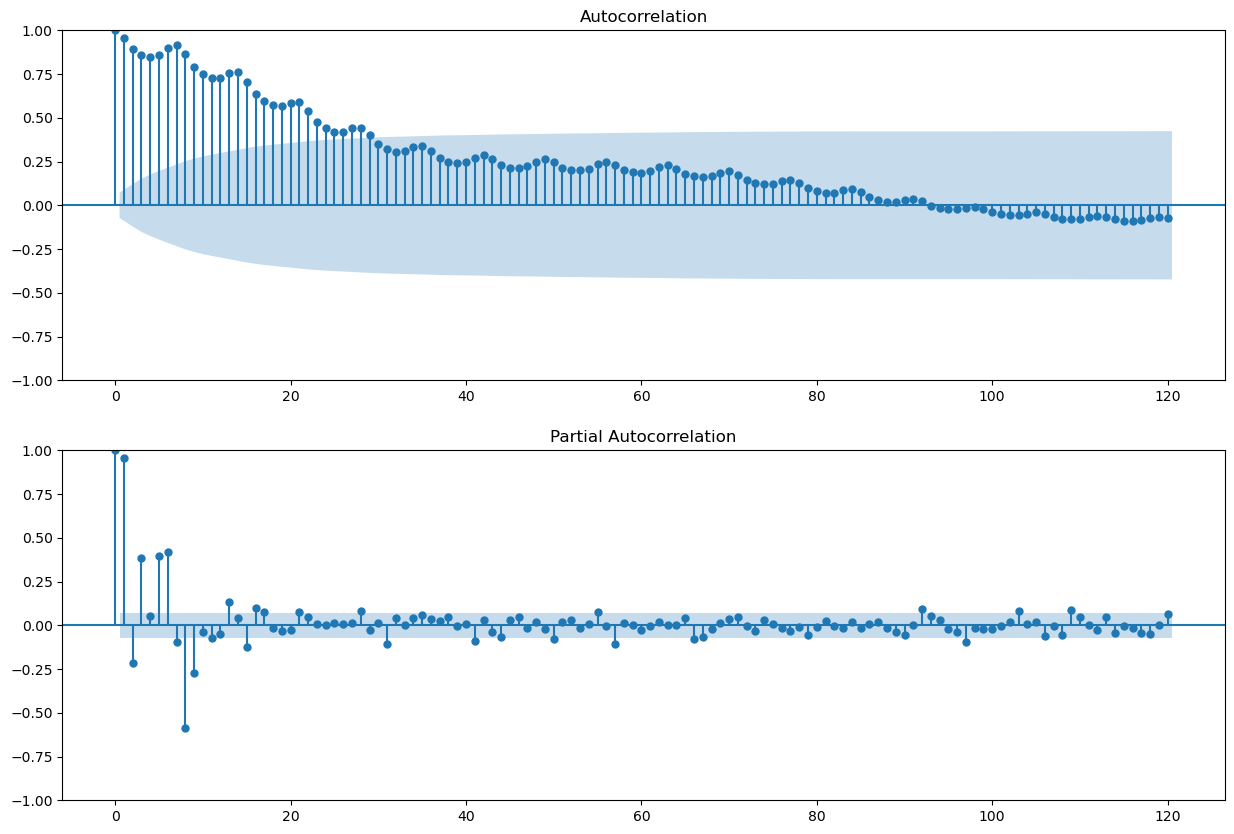

In [7]:
fig, ax = plt.subplots(2, figsize=(15, 10))

ax[0] = plot_acf(df.Poland, ax=ax[0], lags=120)
ax[1] = plot_pacf(df.Poland, ax=ax[1], lags=120)

І для України:

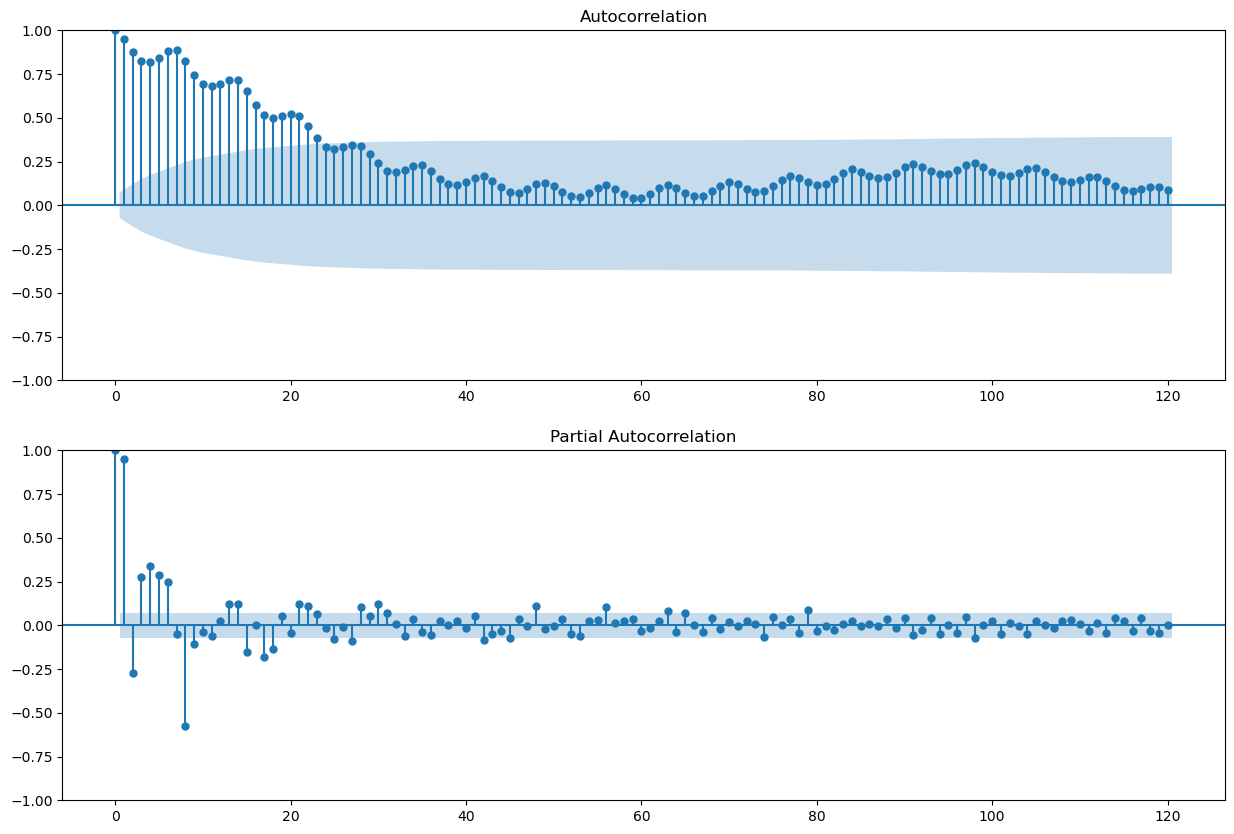

In [8]:
fig, ax = plt.subplots(2, figsize=(15, 10))

ax[0] = plot_acf(df.Ukraine, ax=ax[0], lags=120)
ax[1] = plot_pacf(df.Ukraine, ax=ax[1], lags=120)

### Перевіримо ряд на стаціонарність за допомогою доповненого тесту Дікі-Фуллера:

In [9]:
def dickey_fuller_test(series):
    test = smt.adfuller(series, autolag='AIC')
    print('adf: ', test[0])
    print('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0] > test[4]['5%']: 
        print('Наявні одиничні корені, ряд не стаціонарний.')
    else:
        print('Одиничні корені відсутні, ряд є стаціонарним.')

print('======Польща======')
dickey_fuller_test(df.Poland)
print('======Україна======')
dickey_fuller_test(df.Ukraine)

======Польща======
adf:  -3.1699360064215782
p-value:  0.021792196926620957
Critical values:  {'1%': -3.439516060164992, '5%': -2.8655850998755263, '10%': -2.5689240826597173}
Одиничні корені відсутні, ряд є стаціонарним.
======Україна======
adf:  -4.747762443665012
p-value:  6.838317888196062e-05
Critical values:  {'1%': -3.4395677423210493, '5%': -2.8656078730509784, '10%': -2.5689362152032573}
Одиничні корені відсутні, ряд є стаціонарним.


### Завдання 2

Побудувати та проаналізувати часовий ряд для курсу гривня/долар або гривня/євро за останні 3 роки (дані взяти в інтернеті). 

In [10]:
df = pd.read_csv('USD_UAH Historical Data.csv', usecols=['Date', 'Price'], index_col=['Date'], parse_dates=['Date'])
df

,Price
Date,
2023-05-17,36.9243
2023-05-16,36.9300
2023-05-15,36.9000
2023-05-12,36.9300
2023-05-11,36.8410
...,...
2020-05-22,26.8900
2020-05-21,26.7400
2020-05-20,26.7250


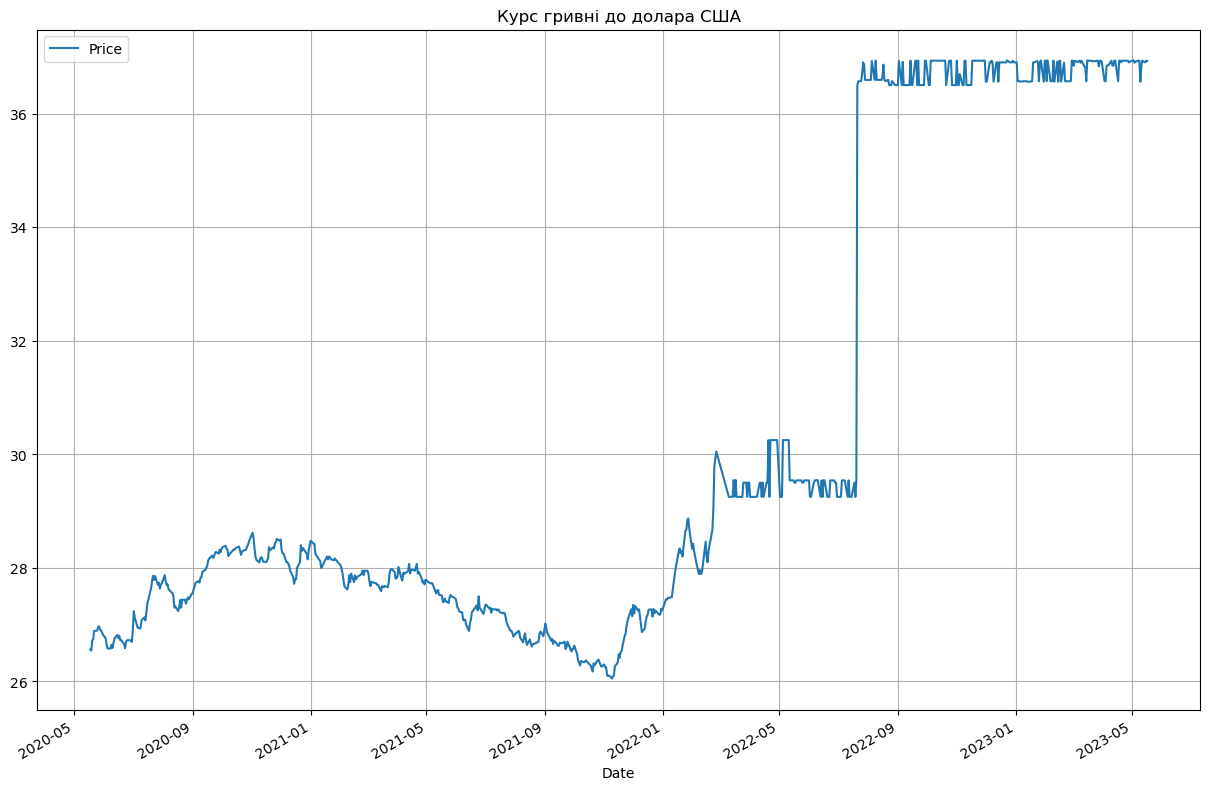

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
df.plot(ax=ax)
plt.title('Курс гривні до долара США')
ax.grid()
plt.show()

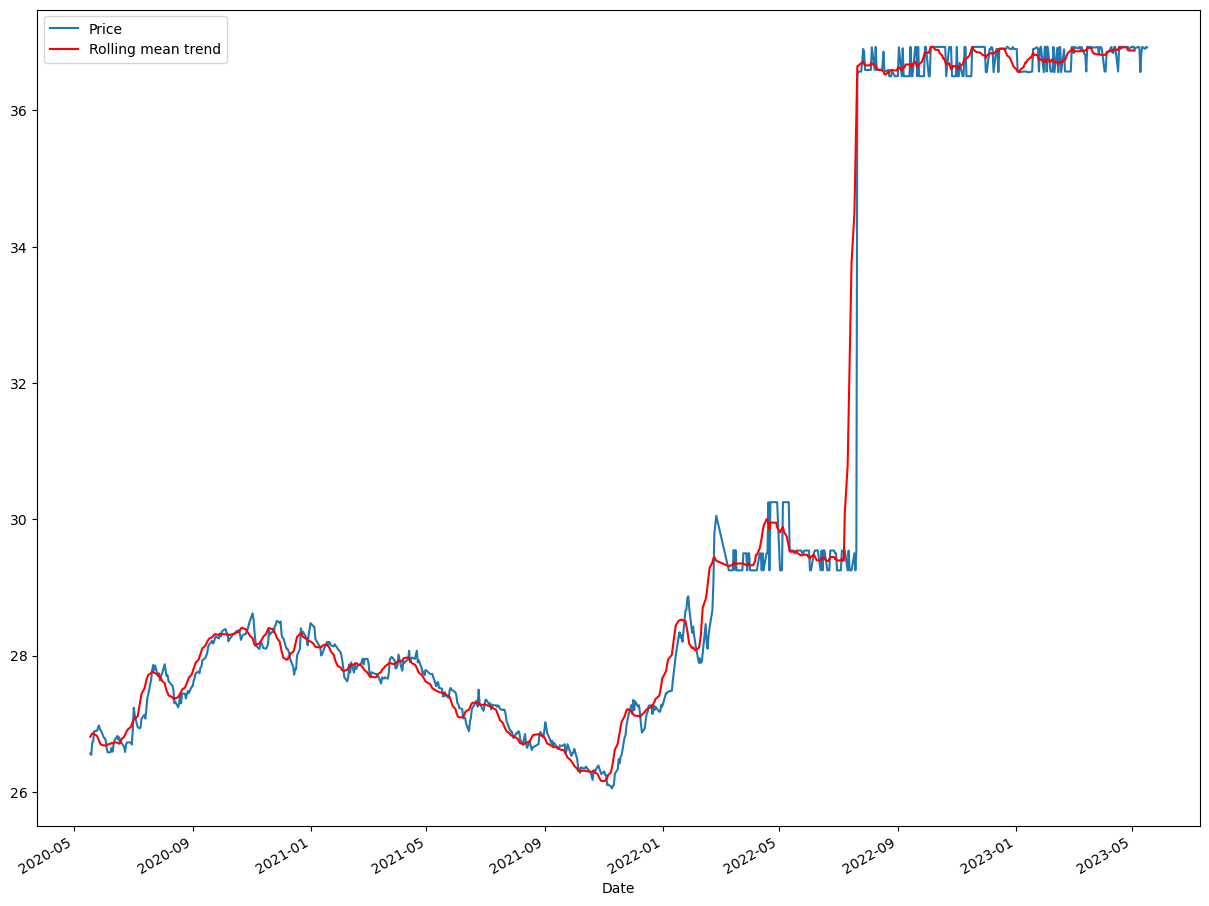

In [12]:
rolling_mean = df.Price.rolling(window=10).mean()

fig, ax = plt.subplots(figsize=(15, 12))

df.Price.plot(ax = ax)
ax.plot(rolling_mean, color='red',label='Rolling mean trend')

ax.legend(loc='upper left')

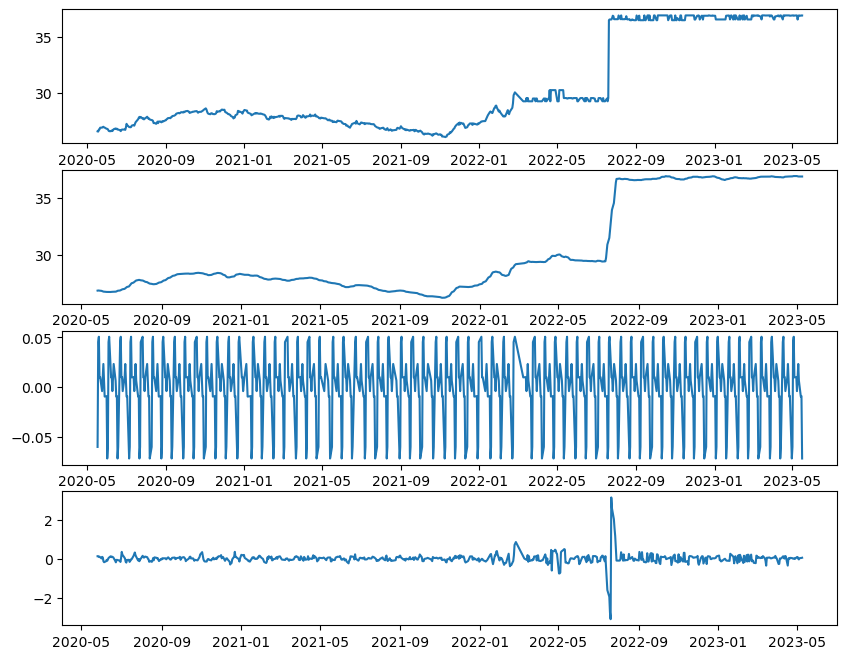

In [13]:
result = smt.seasonal_decompose(df['Price'], model='additive', period=12)

plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index, df['Price'])

plt.subplot(4, 1, 2)
plt.plot(df.index, result.trend)

plt.subplot(4, 1, 3)
plt.plot(df.index, result.seasonal)

plt.subplot(4, 1, 4)
plt.plot(df.index, result.resid)

D:\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


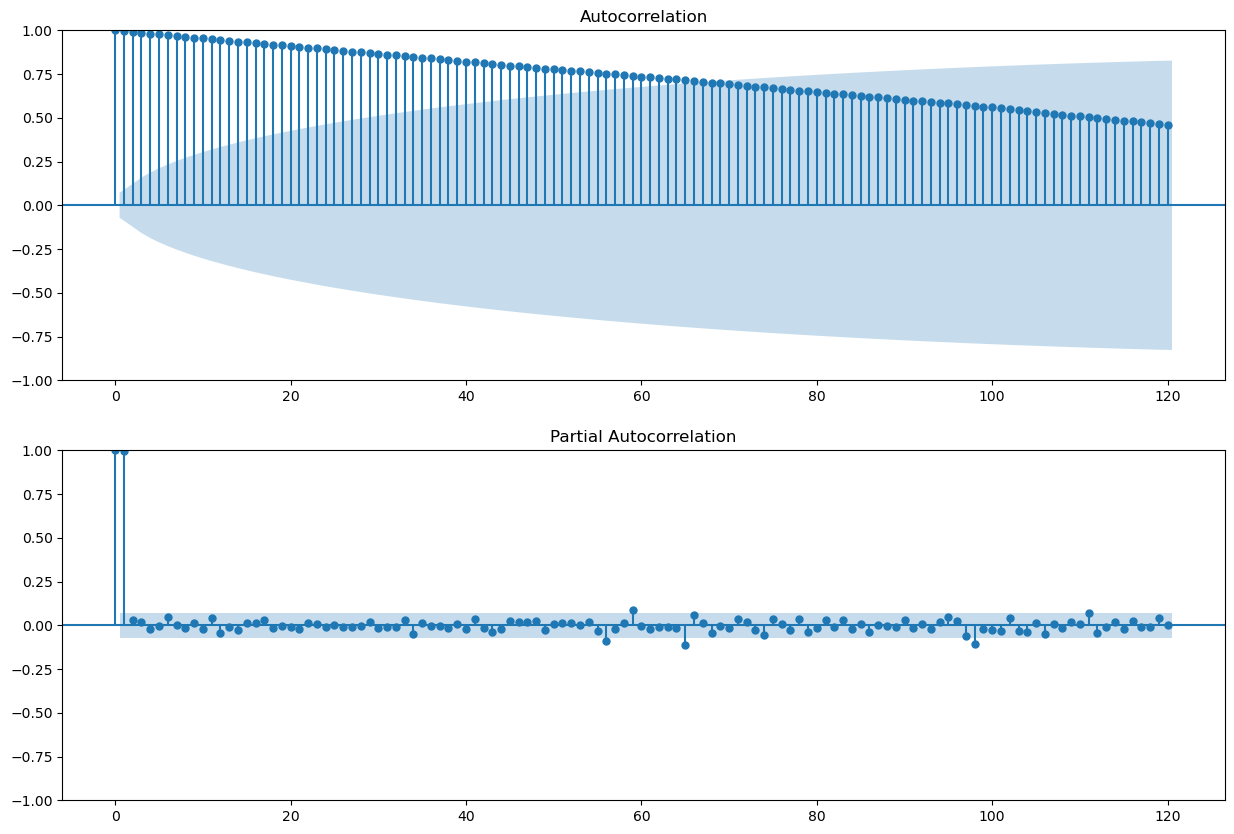

In [14]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(df.Price, ax=ax[0], lags=120)
ax[1] = plot_pacf(df.Price, ax=ax[1], lags=120)

In [15]:
dickey_fuller_test(df.Price)

adf:  -1.4272651246107881
p-value:  0.5691373468696624
Critical values:  {'1%': -3.4390409569041207, '5%': -2.865375732701395, '10%': -2.568812543748081}
Наявні одиничні корені, ряд не стаціонарний.


### Додаткове завдання
Градуси перевести в Цельсії. 
Чи є кореляція між температурою та опадами? 
Скласти прогноз опадів на 2018 рік, оцінити точність прогнозу


In [114]:
df = pd.read_csv('seattleWeather_1948-2017.csv')
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [115]:
df['TMAX'] = df['TMAX'].apply(lambda x: round((x - 32) * 5/9, 2))
df['TMIN'] = df['TMIN'].apply(lambda x: round((x - 32) * 5/9, 2))
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,10.56,5.56,True
1,1948-01-02,0.59,7.22,2.22,True
2,1948-01-03,0.42,7.22,1.67,True
3,1948-01-04,0.31,7.22,1.11,True
4,1948-01-05,0.17,7.22,0.00,True
...,...,...,...,...,...
25546,2017-12-10,0.00,9.44,1.11,False
25547,2017-12-11,0.00,9.44,-1.67,False
25548,2017-12-12,0.00,7.78,0.00,False
25549,2017-12-13,0.00,8.89,1.11,False


In [116]:
correlation = df['TMAX'].corr(df['PRCP'])
print(f"Корреляция между температурой и осадками: {correlation}")

Корреляция между температурой и осадками: -0.22673153705586732


In [117]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

df.dropna(inplace=True)
df.drop(['RAIN'], axis=1, inplace=True)
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

start_date = df.index[-1] + timedelta(days=1)
end_date = start_date + timedelta(days=365)
new_dates = pd.date_range(start_date, end_date, freq='D')

new_data = {'PRCP': np.nan, 'TMAX': np.nan, 'TMIN': np.nan}
new_df = pd.DataFrame(index=new_dates, data=new_data)

combined_df = pd.concat([df, new_df], axis=0)
combined_df

model = smt.ARIMA(combined_df.PRCP, order=(1, 1, 1)).fit()

D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   PRCP   No. Observations:                25914
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1759.217
Date:                Thu, 18 May 2023   AIC                          -3512.433
Time:                        22:53:42   BIC                          -3487.946
Sample:                             0   HQIC                         -3504.521
                              - 25914                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2445      0.003     70.774      0.000       0.238       0.251
ma.L1         -0.9664      0.001   -647.151      0.000      -0.969      -0.963
sigma2         0.0510      0.000    431.333      0.000       0.051       0.051
===================================================================================
Ljung-Box (L1) (Q):                   1.00   Jarque-Bera (JB):           1318552.34
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             4.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
start_date = combined_df.index[-370]

last_date = start_date + pd.DateOffset(days=1)

prediction_period = pd.DateOffset(days=365)
end_date = start_date + prediction_period

pred = model.predict(start=start_date, end=end_date)

predictions_df = pd.DataFrame(pred, index=pd.date_range(start=start_date, end=end_date), columns=['Predicted'])

<AxesSubplot:>

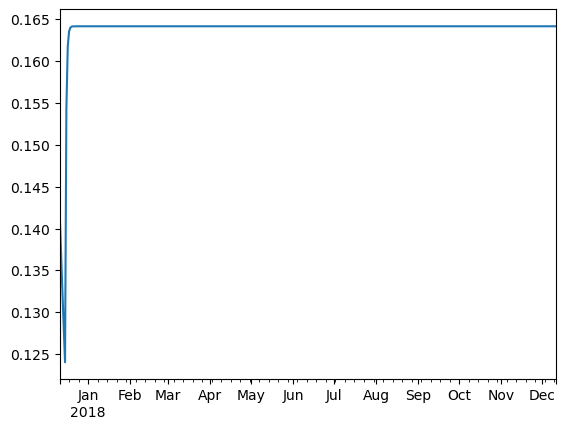

In [132]:
pred.plot()

### Висновок
Під час виконання практичної роботи я ознайомився з методами моделювання часових послідовностей. Було побудовано та проаналізовано часові ряди для двох наборів даних, перевірено їх на стаціонарність.